In [20]:
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

In [3]:
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_data))
y_data = x_data * 0.1 + 0.3 + noise

In [8]:
W = tf.Variable(tf.random_uniform([1], 0.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

print(W)
print(b)

<tf.Variable 'Variable_5:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'Variable_6:0' shape=(1,) dtype=float32_ref>


In [10]:
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [11]:
print(tf.get_default_graph().as_graph_def())

node {
  name: "random_uniform/shape"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 1
          }
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "random_uniform/min"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 0.0
      }
    }
  }
}
node {
  name: "random_uniform/max"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 1.0
      }
    }
  }
}
node {
  name: "random_uniform/RandomUniform"
  op: "RandomUniform"
  input: "random_uniform/shape"
  attr {
    key: "T"
    value {
    

In [13]:
sess = tf.Session()
sess.run(init)
y_initial_values = sess.run(y)

print(sess.run([W, b]))

[array([ 0.35684371], dtype=float32), array([ 0.], dtype=float32)]


In [14]:
for step in range(201):
    sess.run(train)
    
print(sess.run([W, b]))

[array([ 0.09664067], dtype=float32), array([ 0.29999614], dtype=float32)]


(0, 1.0)

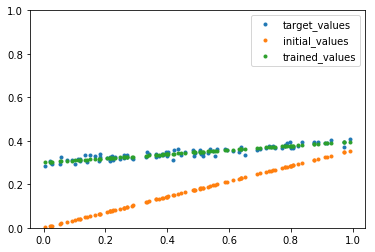

In [21]:
pylab.plot(x_data, y_data, '.', label="target_values")
pylab.plot(x_data, y_initial_values, ".", label="initial_values")
pylab.plot(x_data, sess.run(y), ".", label="trained_values")
pylab.legend()
pylab.ylim(0, 1.0)